# IMPORTING THE LIBRARIES

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

# IMPORTING THE DATASETS

In [4]:
df_train = pd.read_csv("stocknet_trn_data-2.csv")
df_target = pd.read_csv("stocknet_trn_data_targets.csv", header=None)
df_test = pd.read_csv("stocknet_tst_data-2.csv")

# EXPLORING THE DATASETS

In [5]:
df_train.head()

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0


In [6]:
df_target.head()

,0,1
0,d1,75.650002
1,d2,124.449997
2,d3,82.660004
3,d4,57.009998
4,d5,47.860001


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97732 entries, 0 to 97731
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    97729 non-null  float64
 1   High    97729 non-null  float64
 2   Low     97729 non-null  float64
 3   Volume  97729 non-null  float64
dtypes: float64(4)
memory usage: 3.0 MB


**we see that each feature has 97729 non-null values**

In [8]:
df_train.describe()

,Open,High,Low,Volume
count,97729.000000,97729.000000,97729.000000,9.772900e+04
mean,2427.661341,2439.557429,2413.965223,9.064781e+06
std,21797.841949,21900.340643,21678.006665,1.800910e+07
min,2.130000,2.280000,1.960000,0.000000e+00
25%,40.450001,40.730000,40.180000,1.198000e+06
50%,65.959999,66.489998,65.459999,3.544600e+06
75%,97.669998,98.470001,96.930000,8.996400e+06
max,272800.000000,272885.000000,271040.000000,6.166205e+08


we see that the stock prices vary from a minimum of 2.13 dollar of a stock to 272800 dollar. 

In [9]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97732 entries, 0 to 97731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       97732 non-null  object 
 1   1       97729 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [10]:
df_target.describe()

,1
count,97729.000000
mean,2427.381769
std,21794.748626
min,2.020000
25%,40.459999
50%,66.010002
75%,97.669998
max,271062.000000


we see that in the index column there are 97732 entries while in the column containing the prices has 97729 entires.

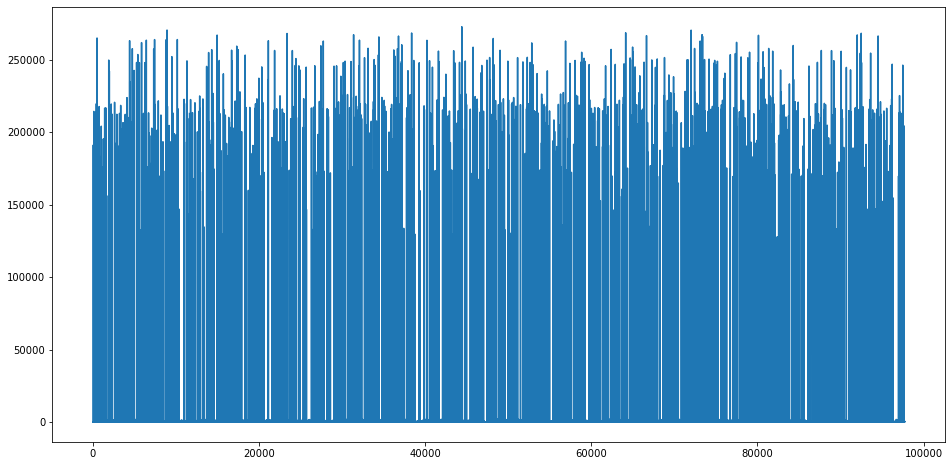

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df_train["Open"],label='Open Price history')

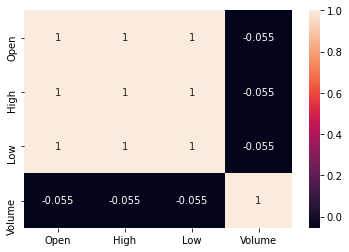

In [12]:
import seaborn as sns
ax = sns.heatmap(df_train.corr(), annot=True)

We see that the correlation between the open,high,low is 1. 1 indicates a perfectly positive linear correlation between two variables.

In [13]:
X = df_train
y= df_target.iloc[:,1]

In [14]:
print(X.shape,y.shape)

(97732, 4) (97732,)


In [15]:
X = X.dropna()
y = y.dropna()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 42)

## FEATURE SELECTION FOR LINEAR REGRESSION MODEL

Feature 0: 1539337061.918892
Feature 1: 3601959825.537310
Feature 2: 3164765254.539999
Feature 3: 230.777136


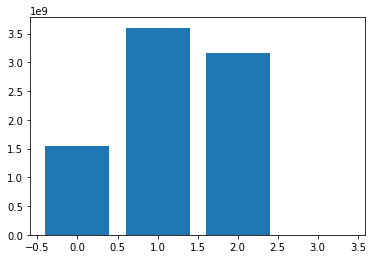

In [17]:

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 

def select_features(X_train, y_train, X_test):

    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [18]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()
Linear.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred= Linear.predict(X_test)  

In [20]:
print('Train Score: ', Linear.score(X_train, y_train))  
print('Test Score: ', Linear.score(X_test, y_test)) 

Train Score:  0.999988675498941
Test Score:  0.9999912850197161


In [21]:
data1 = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})

In [22]:
data1

,Actual,Predicted
35030,1357.790039,1356.738326
49854,101.209999,100.616831
85068,58.810001,58.448642
5864,131.130005,130.956207
64540,19.030001,19.113305
...,...,...
30303,113.330002,113.941679
55385,185.309998,186.325347
54408,71.809998,71.745474
49435,26.750000,26.613362


# EVALUATION OF OUR MODEL

## MSE 

In [23]:
error = np.sum(np.sqrt((y_pred - y_test)**2))/(X_test.shape[0])

In [24]:
error_squared = np.sum((y_pred - y_test)**2)/(X_test.shape[0])
error_squared

4234.895335741074

In [25]:
from sklearn.metrics import accuracy_score,mean_absolute_percentage_error
error_sc = mean_absolute_percentage_error(y_pred,y_test)
print(error_sc)

0.003651962914036215


In [26]:
accuracy = 100 - sum(((abs(y_pred - y_test)/y_test)*100))/X_test.shape[0]

In [27]:
accuracy

99.63511744786663

In [28]:
import sklearn.metrics as metrics
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 5.8846671624926055
Mean Squared Error: 4234.895335741074
Root Mean Squared Error: 65.07607345054765


# Lasso regression

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [29]:
list_numerical = X.columns
list_numerical

Index(['Open', 'High', 'Low', 'Volume'], dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 42)

## Standardization

**Lasso performs best when all numerical features are centered around 0 and have variance in the same order.**

In [31]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical]) 

X_train[list_numerical] = scaler.transform(X_train[list_numerical])

X_test[list_numerical] = scaler.transform(X_test[list_numerical])

<ipython-input-31-0760f926d483>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[list_numerical] = scaler.transform(X_train[list_numerical])
/Users/dishantdigdarshi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/dishantdigdarshi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [32]:
X_train.head()

,Open,High,Low,Volume
74419,-0.107833,-0.107848,-0.107826,-0.492653
74101,-0.097226,-0.097177,-0.097220,-0.305865
47249,-0.104895,-0.104890,-0.104875,-0.432678
29691,-0.107889,-0.107876,-0.107880,-0.407121
26840,-0.106447,-0.106488,-0.106430,-0.200103


## Implimentation Of Model

In [33]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

## Evaluating The Model

In [34]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 23983.81
MSE test set 28838.26


In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 15.032213051734601
Mean Squared Error: 28838.263025216238
Root Mean Squared Error: 169.8183235849896


## k-fold cross validation

In [36]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [37]:
model.alpha_

21.7316257894155

## Best Model For Lasso

In [38]:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=21.7316257894155)

# Random Forest Regressor

In [39]:
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 42)

In [41]:
model = RandomForestRegressor(n_estimators = 85, random_state = 0)

In [43]:
# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=85, random_state=0)

In [45]:
y_pred1 = model.predict(X_test)

## Evaluating The Model

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred1))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

Mean Absolute Error: 9.00976676192824
Mean Squared Error: 11265.253395701584
Root Mean Squared Error: 106.13789801810465


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
n_estimators=np.arange(5,100,20)
param_grid = {'n_estimators': n_estimators,'max_depth': [10, 50, None], 'bootstrap': [True, False]}
model = GridSearchCV(estimator = rf,param_grid=param_grid, cv = 5, verbose=2, n_jobs = -1)
model.fit(X_train,y_train)
model.best_params_

# KNN Regressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 42)

# Data Preprocessing

In [57]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 157.41803248314534
RMSE value for k=  2 is: 160.33886686643356
RMSE value for k=  3 is: 164.8718183132455
RMSE value for k=  4 is: 161.6364276603481
RMSE value for k=  5 is: 163.1101309966165
RMSE value for k=  6 is: 166.73869668653927
RMSE value for k=  7 is: 168.88180409710858
RMSE value for k=  8 is: 171.4486557794011
RMSE value for k=  9 is: 175.950352632393
RMSE value for k=  10 is: 179.26894989903636
RMSE value for k=  11 is: 183.54823157750053
RMSE value for k=  12 is: 183.93294575797896
RMSE value for k=  13 is: 188.55717553007358
RMSE value for k=  14 is: 190.66831027768768
RMSE value for k=  15 is: 194.24779212790006
RMSE value for k=  16 is: 196.44101669705972
RMSE value for k=  17 is: 198.07410544365666
RMSE value for k=  18 is: 200.37353718403156
RMSE value for k=  19 is: 202.5616147568574
RMSE value for k=  20 is: 206.53234664287967


In [59]:
knn_reg = KNeighborsRegressor(n_neighbors=15)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [60]:
y_pred_knn = knn_reg.predict(X_test)

In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_knn))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,y_pred_knn)))

Mean Absolute Error: 60.26588930909649
Mean Squared Error: 37732.204746563875
Root Mean Squared Error: 194.24779212790006


# Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

# Prediction

In [69]:

y_pred1=Linear.predict(df_test)
test_pred = pd.DataFrame(y_pred1,index=None)
test_pred.to_csv('test_pred.txt',header = None, index=None)